<a href="https://colab.research.google.com/github/blakesodikoff/CO2Spectroscopy/blob/main/Week1_CO2Spectroscopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np


In [ ]:
uploaded = files.upload()

Saving psg_trn.txt to psg_trn (2).txt


In [ ]:
for file_name in uploaded.keys():
    data = pd.read_csv(file_name, delim_whitespace=True, comment='#', names=['Wavelength [um]', 'Total', 'H2O', 'CO2', 'CH4'])

In [ ]:
print(data.head())
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

   Wavelength [um]     Total       H2O  CO2       CH4
0         1.000000  0.998100  0.998182  1.0  0.999918
1         1.000014  0.998346  0.998386  1.0  0.999961
2         1.000029  0.998296  0.998322  1.0  0.999974
3         1.000043  0.988690  0.988753  1.0  0.999936
4         1.000057  0.979044  0.979148  1.0  0.999894


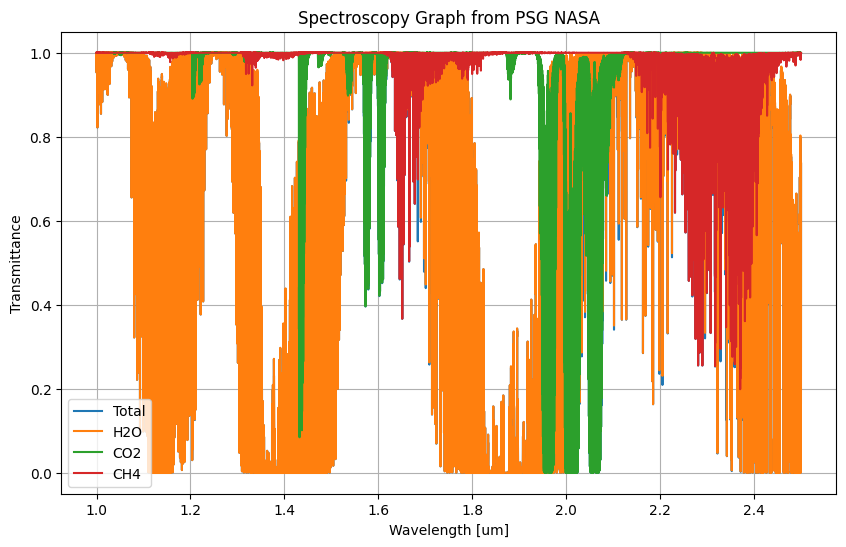

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Wavelength [um]'], data['Total'], label='Total')
plt.plot(data['Wavelength [um]'], data['H2O'], label='H2O')
plt.plot(data['Wavelength [um]'], data['CO2'], label='CO2')
plt.plot(data['Wavelength [um]'], data['CH4'], label='CH4')

plt.xlabel('Wavelength [um]')
plt.ylabel('Transmittance')
plt.title('Spectroscopy Graph from PSG NASA')

plt.legend()
plt.grid(True)

plt.show()

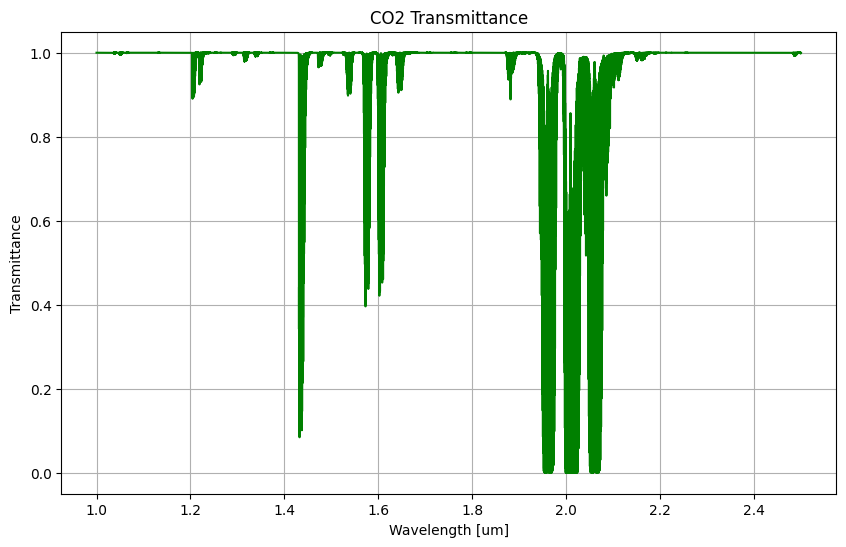

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Wavelength [um]'], data['CO2'], label='CO2', color='green')


plt.xlabel('Wavelength [um]')
plt.ylabel('Transmittance')
plt.title('CO2 Transmittance')


plt.grid(True)
plt.show()

In [ ]:
co2_saturation = data[(data['CO2'] < 0.1) & (data['H2O'] > 0.8) & (data['CH4'] > 0.8)]
co2_non_saturation = data[(data['CO2'] > 0.9) & (data['H2O'] > 0.8) & (data['CH4'] > 0.8)]


print("Regions where CO2 is saturated (CO2 < 0.1):")
print(co2_saturation[['Wavelength [um]', 'CO2']])

print("\nRegions where CO2 is not saturated (CO2 > 0.9):")
print(co2_non_saturation[['Wavelength [um]', 'CO2']])

Regions where CO2 is saturated (CO2 < 0.1):
       Wavelength [um]       CO2
46795         1.951299  0.077550
46796         1.951327  0.086701
46811         1.951745  0.054355
46812         1.951773  0.046411
47161         1.961528  0.045837
...                ...       ...
50938         2.070273  0.083339
50939         2.070303  0.004186
50965         2.071072  0.006405
50991         2.071841  0.017920
51018         2.072640  0.030566

[289 rows x 2 columns]

Regions where CO2 is not saturated (CO2 > 0.9):
       Wavelength [um]       CO2
0             1.000000  1.000000
1             1.000014  1.000000
2             1.000029  1.000000
3             1.000043  1.000000
4             1.000057  1.000000
...                ...       ...
63518         2.477856  0.999992
63519         2.477891  0.999991
63528         2.478210  0.999996
64101         2.498579  0.999375
64102         2.498614  0.999773

[40971 rows x 2 columns]


In [ ]:
range_saturation = data[(data['Wavelength [um]'] >= 2.0) & (data['Wavelength [um]'] <= 2.1)]
range_non_saturation = data[(data['Wavelength [um]'] >= 1.1) & (data['Wavelength [um]'] <= 1.2)]

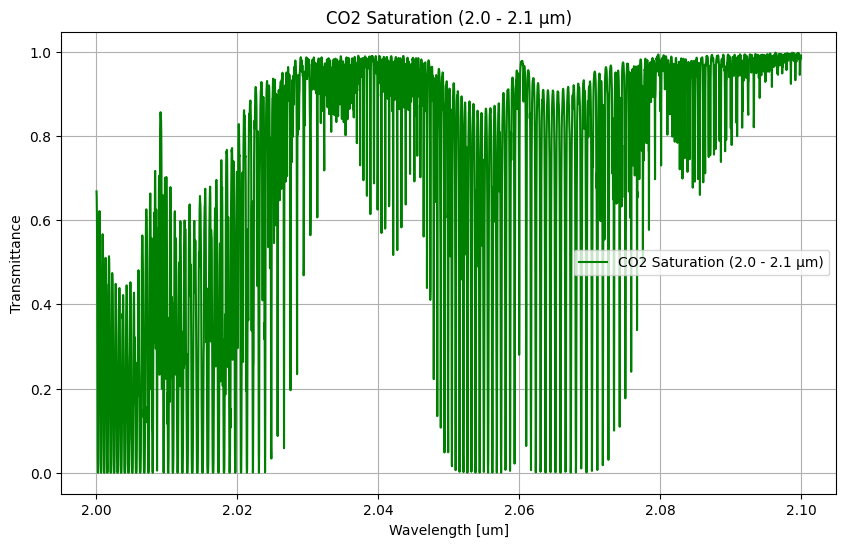

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range_saturation['Wavelength [um]'], range_saturation['CO2'], label='CO2 Saturation (2.0 - 2.1 µm)', color='green')

plt.xlabel('Wavelength [um]')
plt.ylabel('Transmittance')
plt.title('CO2 Saturation (2.0 - 2.1 µm)')

plt.grid(True)
plt.legend()
plt.show()

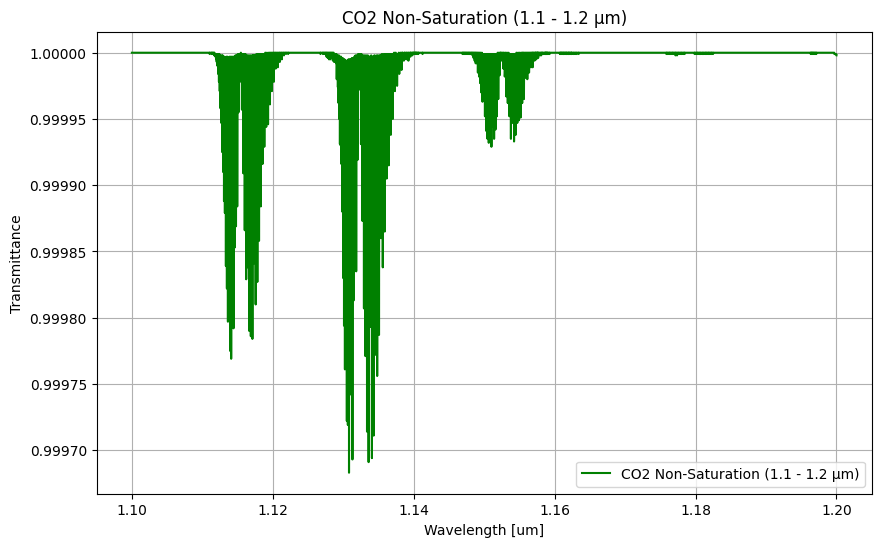

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range_non_saturation['Wavelength [um]'], range_non_saturation['CO2'], label='CO2 Non-Saturation (1.1 - 1.2 µm)', color='green')

plt.xlabel('Wavelength [um]')
plt.ylabel('Transmittance')
plt.title('CO2 Non-Saturation (1.1 - 1.2 µm)')

plt.grid(True)
plt.legend()
plt.show()


In [ ]:
area_saturation = np.trapz(range_saturation['CO2'], range_saturation['Wavelength [um]'])

In [ ]:
area_non_saturation = np.trapz(range_non_saturation['CO2'], range_non_saturation['Wavelength [um]'])

In [ ]:
print(f"Area under the curve for CO2 saturation (2.0 - 2.1 µm): {area_saturation} µm")
print(f"Area under the curve for CO2 non-saturation (1.1 - 1.2 µm): {area_non_saturation} µm")


Area under the curve for CO2 saturation (2.0 - 2.1 µm): 0.07311831810749977 µm
Area under the curve for CO2 non-saturation (1.1 - 1.2 µm): 0.09998555643091693 µm
